In [19]:
import numpy as np
import pandas as pd
from sklearn import datasets, svm, linear_model, model_selection, metrics, naive_bayes
from sklearn import calibration
from matplotlib import pyplot as plt

In [3]:
X, y = datasets.make_classification(n_samples=100000, 
                                    n_features=20, 
                                    n_classes=2, 
                                    n_redundant=10, 
                                    n_informative=2, 
                                    random_state=66)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.99,
                                                                    random_state=0
                                                                   )

In [4]:
np.unique(y)

array([0, 1])

In [5]:
gnb = naive_bayes.GaussianNB().fit(X_train, y_train)
gnb.predict(X_test)

array([1, 0, 0, ..., 1, 1, 1])

In [7]:
gnb_prob = gnb.predict_proba(X_test)
gnb_prob

array([[2.67968085e-16, 1.00000000e+00],
       [9.99999999e-01, 9.78107570e-10],
       [1.00000000e+00, 1.88385222e-14],
       ...,
       [1.32734947e-01, 8.67265053e-01],
       [4.73340601e-02, 9.52665940e-01],
       [2.57643813e-05, 9.99974236e-01]])

In [10]:
# 取出其中的一列
gnb_prob = gnb_prob[:, 1]
df = pd.DataFrame({'y_true': y_test[:500], 'probability': gnb_prob[:500]})
df

,y_true,probability
0,1,1.000000e+00
1,0,9.781076e-10
2,0,1.883852e-14
3,0,5.896070e-05
4,1,1.000000e+00
5,0,1.296094e-05
6,1,9.999991e-01
7,0,3.472079e-01
8,0,1.289363e-02
9,0,5.595302e-13


In [12]:
df = df.sort_values(by=['probability'])
df.index = range(df.shape[0])
df

,y_true,probability
0,0,7.111441e-32
1,0,1.105523e-31
2,0,6.430154e-29
3,0,7.490109e-28
4,0,1.084853e-27
5,0,2.205701e-27
6,0,3.428182e-27
7,0,4.819658e-26
8,0,1.678031e-25
9,0,1.874425e-25


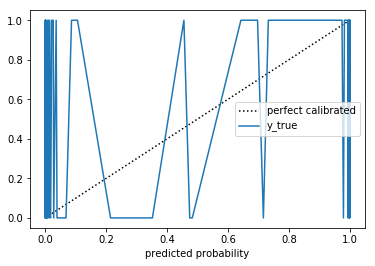

In [16]:
# 开始绘制校准曲线图
fig = plt.figure()
ax = plt.subplot()
ax.plot([0, 1], [0, 1], 'k:', label='perfect calibrated')
# ax.plot(df['probability'], df['y_true'], 's-', label='%s, (%.3f)' % ('bayes', gnb.score(X_test, y_test)))

ax.plot(df['probability'], df['y_true'])
ax.set_xlabel('predicted probability')
ax.set_ylim([-0.05, 1.05])
ax.legend()
plt.show()

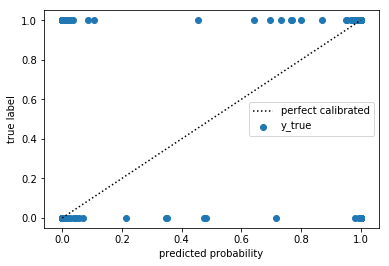

In [18]:
# 换成散点图
fig = plt.figure()
ax = plt.subplot()
ax.plot([0, 1], [0, 1], 'k:', label='perfect calibrated')
ax.scatter(df['probability'], df['y_true'])
ax.set_ylabel('true label')
ax.set_xlabel('predicted probability')
ax.set_ylim([-0.05, 1.05])
ax.legend()
plt.show()

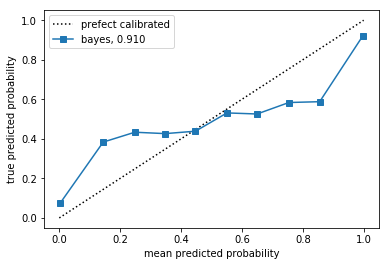

In [20]:
# 绘制calibration_curve曲线
# n_bins 一般分5~8箱
true_prob, pred_prob = calibration.calibration_curve(y_test, gnb_prob, n_bins=10)
fig = plt.figure()
ax = plt.subplot()
ax.plot([0, 1], [0, 1], 'k:', label='prefect calibrated')
ax.plot(pred_prob, true_prob, 's-', label='%s, %.3f' % ('bayes', gnb.score(X_test, y_test)))
ax.set_xlabel('mean predicted probability')
ax.set_ylabel('true predicted probability')
ax.set_ylim([-0.05, 1.05])
ax.legend()
plt.show()

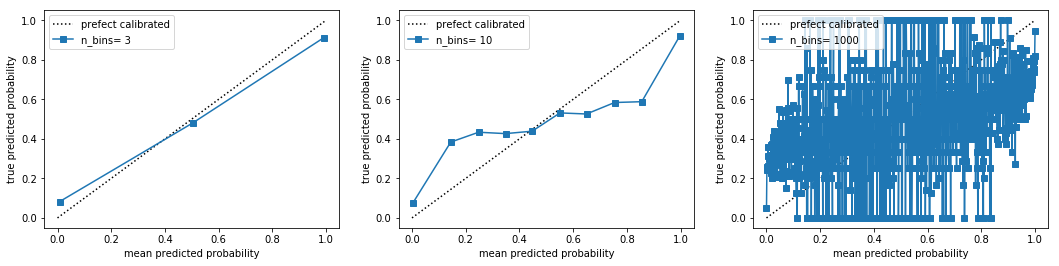

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for index, number in enumerate([3, 10, 1000]):
    ax = axes[index]
    true_prob, pred_prob = calibration.calibration_curve(y_test, gnb_prob, n_bins=number)
    ax.plot([0, 1], [0, 1], 'k:', label='prefect calibrated')
    ax.plot(pred_prob, true_prob, 's-', label='n_bins= %d' % (number))
    ax.set_xlabel('mean predicted probability')
    ax.set_ylabel('true predicted probability')
    ax.set_ylim([-0.05, 1.05])
    ax.legend()
plt.show()

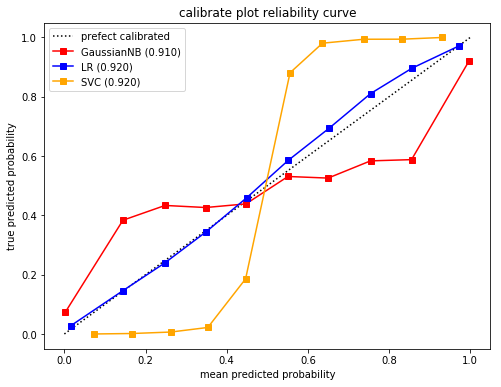

In [44]:
names = ['GaussianNB', 'LR', 'SVC']
gnb = naive_bayes.GaussianNB()
lr = linear_model.LogisticRegression(C=1, solver='lbfgs', multi_class='auto', max_iter=3000)
svc = svm.SVC(kernel='linear', gamma=1)

colors = ['red', 'blue', 'orange']
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([0, 1], [0, 1], 'k:', label='prefect calibrated')
for index, clf, name in zip(range(len(names)), [gnb, lr, svc], names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf, 'predict_proba'):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    # 布里尔分数
    clf_score = metrics.brier_score_loss(y_test, prob_pos, pos_label=y.max())
    true_prob, pred_prob = calibration.calibration_curve(y_test, prob_pos, n_bins=10)
    ax.plot(pred_prob, true_prob, 's-', color=colors[index],label='%s (%.3f)' % (name, clf.score(X_test, y_test)))
ax.set_title('calibrate plot reliability curve')
ax.set_xlabel('mean predicted probability')
ax.set_ylabel('true predicted probability')
ax.set_ylim([-0.05, 1.05])
ax.legend()
plt.show()

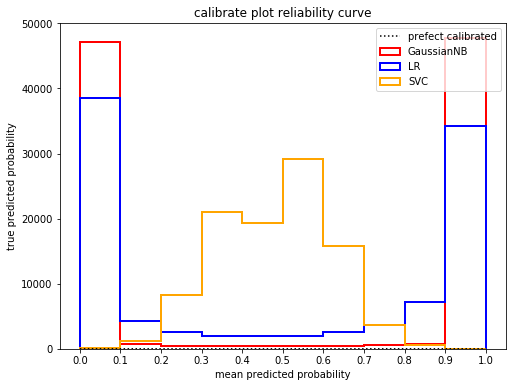

In [49]:
# 概率分布直方图

colors = ['red', 'blue', 'orange']
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([0, 1], [0, 1], 'k:', label='prefect calibrated')
for index, clf, name in zip(range(len(names)), [gnb, lr, svc], names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf, 'predict_proba'):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    ax.hist(prob_pos, bins=10, label=name, histtype='step', lw=2, color=colors[index])
ax.set_title('calibrate plot reliability curve')
ax.set_xlabel('mean predicted probability')
ax.set_ylabel('true predicted probability')
ax.set_xlim([-0.05, 1.05])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend()
plt.show()

In [61]:
# 校准可靠性曲线
def plot_calibriated(models, names, X_train, X_test, y_train, y_test, n_bins=10):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    ax1.plot([0, 1], [0, 1], 'k:', label='prefect calibrated')
    for index, clf, name in zip(range(len(names)), models, names):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, 'predict_proba'):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:
            prob_pos = clf.decision_function(X_test)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        # 布里尔分数
        clf_score = metrics.brier_score_loss(y_test, prob_pos, pos_label=y.max())
        true_prob, pred_prob = calibration.calibration_curve(y_test, prob_pos, n_bins=10)
        ax1.plot(pred_prob, true_prob, 's-',label='%s (%.3f)' % (name, clf.score(X_test, y_test)))
        # 绘制直方图
        ax2.hist(prob_pos, bins=n_bins, label=name, histtype='step', lw=2)

    ax1.set_title('calibrate plot reliability curve')
    ax1.set_xlabel('mean predicted probability')
    ax1.set_ylabel('true predicted probability')
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    
    ax2.set_title('hist plot reliability curve')
    ax2.set_xlabel('mean predicted probability')
    ax2.set_ylabel('true predicted probability')
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    plt.show()

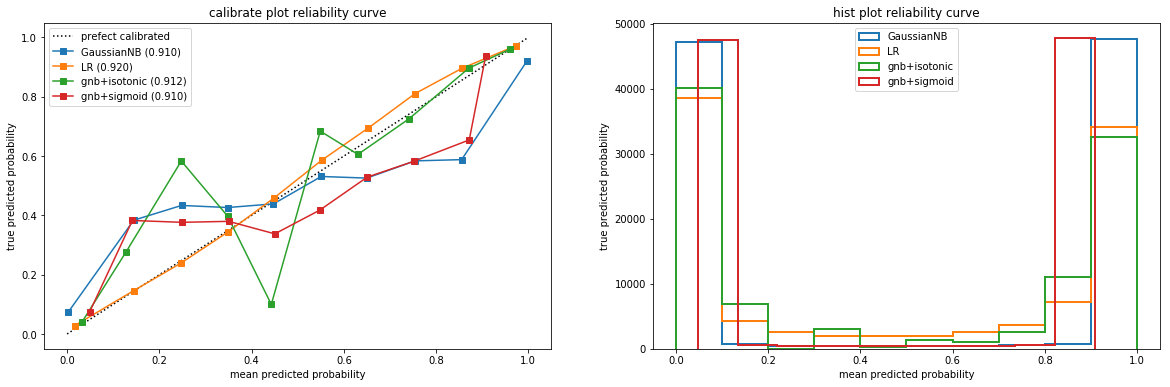

In [62]:
# 实例化模型
gnb = naive_bayes.GaussianNB()
models = [gnb,
          linear_model.LogisticRegression(C=1.0, solver='lbfgs',multi_class='auto', max_iter=3000),
          calibration.CalibratedClassifierCV(base_estimator=gnb, method='isotonic', cv=2),
          calibration.CalibratedClassifierCV(base_estimator=gnb, method='sigmoid', cv=2)
         ]
names = ['GaussianNB', 'LR', 'gnb+isotonic', 'gnb+sigmoid']

plot_calibriated(models, names, X_train, X_test, y_train, y_test, n_bins=10 )

In [63]:
# 再次比较他们的布里尔分数
gnb = naive_bayes.GaussianNB().fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9097777777777778

In [66]:
pred_prob = gnb.predict_proba(X_test)
metrics.brier_score_loss(y_test, pred_prob[:, 1], pos_label=1)

0.08262590631330058

In [68]:
gnb_isotonic = calibration.CalibratedClassifierCV(base_estimator=gnb, 
                                                  cv=2, 
                                                  method='isotonic').fit(X_train, y_train)
score = gnb_isotonic.score(X_test, y_test)
prob = gnb_isotonic.predict_proba(X_test)
brier_score = metrics.brier_score_loss(y_test, prob[:, 1], pos_label=1)

print('gnb_isotonic score:', score, 'brier_score_loss', brier_score)





gnb_isotonic score: 0.9115050505050505 brier_score_loss 0.07231331273603644


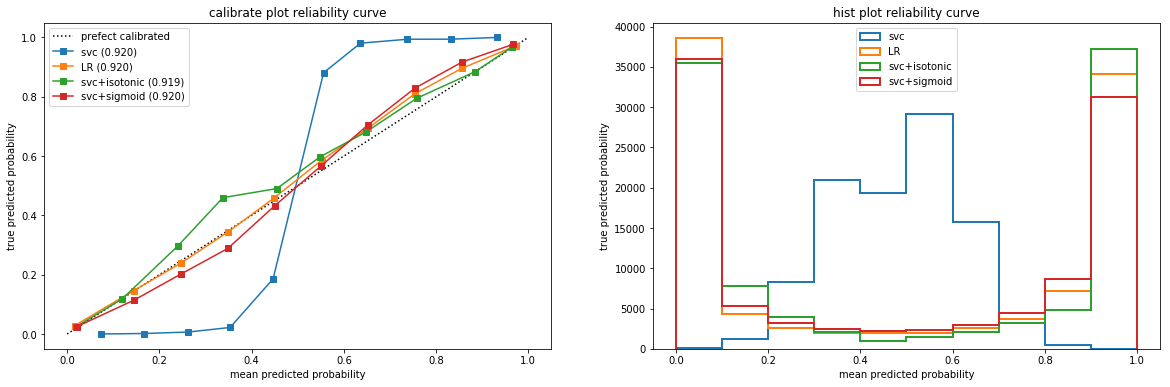

In [69]:
# 实例化模型
svc = svm.SVC(kernel='linear', gamma=1)
models = [svc,
          linear_model.LogisticRegression(C=1.0, solver='lbfgs',multi_class='auto', max_iter=3000),
          calibration.CalibratedClassifierCV(base_estimator=svc, method='isotonic', cv=2),
          calibration.CalibratedClassifierCV(base_estimator=svc, method='sigmoid', cv=2)
         ]
names = ['svc', 'LR', 'svc+isotonic', 'svc+sigmoid']

plot_calibriated(models, names, X_train, X_test, y_train, y_test, n_bins=10 )

In [75]:
name_svc = ["SVC","SVC+isotonic","SVC+sigmoid"]

svc = svm.SVC(kernel = "linear",gamma=1)

models_svc = [svc
              ,calibration.CalibratedClassifierCV(svc, cv=2, method='isotonic')
              ,calibration.CalibratedClassifierCV(svc, cv=2, method='sigmoid')]

for clf, name in zip(models_svc,name_svc):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = metrics.brier_score_loss(y_test, prob_pos, pos_label=y.max())
    score = clf.score(X_test,y_test)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

SVC:
	Brier:0.1612
	Accuracy:0.9204
SVC+isotonic:
	Brier:0.0628
	Accuracy:0.9188
SVC+sigmoid:
	Brier:0.0627
	Accuracy:0.9202
